In [2]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
num_class = 10

In [4]:
(train_X, train_Y), (test_X, test_Y) = keras.datasets.mnist.load_data()

In [5]:
print(train_X.shape, test_X.shape, train_Y.shape, test_Y.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


0
(28, 28)


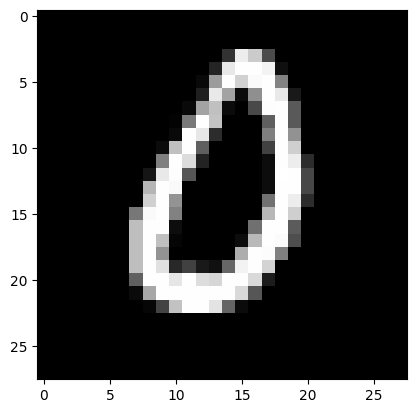

In [14]:
example = train_X[666]
print(train_Y[666])
plt.imshow(example, cmap = 'gray')
print(example.shape)

In [17]:
print(example.max())

255


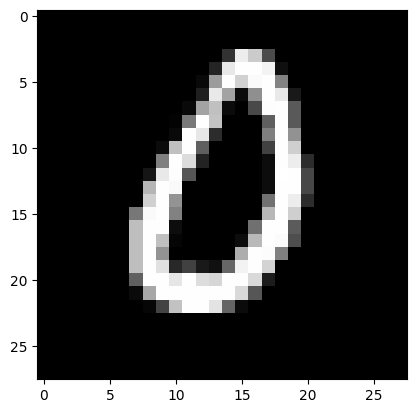

In [20]:
example = example/255
plt.imshow(example, cmap = 'gray')

In [19]:
print(example.max())

1.0


In [21]:
train_X = train_X/255
test_X = test_X/255

In [22]:
print(train_X.shape)

(60000, 28, 28)


In [23]:
train_X = np.expand_dims(train_X, -1)
test_X = np.expand_dims(test_X, -1)

In [24]:
print(train_X.shape)

(60000, 28, 28, 1)


In [25]:
train_Y[0]

5

In [26]:
train_Y = keras.utils.to_categorical(train_Y)
test_Y = keras.utils.to_categorical(test_Y)

In [28]:
train_Y[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [29]:
img_shape = (28, 28, 1)

In [34]:
model = keras.Sequential([
    keras.Input(shape = img_shape),
    keras.layers.Conv2D(60, kernel_size = (3, 3), strides = (2, 2), padding = 'valid', activation = 'relu'), 
    keras.layers.MaxPool2D(pool_size = (3, 3), strides = (1, 1), padding = 'same'),
    keras.layers.Conv2D(120, kernel_size = (3, 3), strides = (2, 2), padding = 'valid', activation = 'relu'), 
    keras.layers.MaxPool2D(pool_size = (3, 3), strides = (1, 1), padding = 'same'),
    keras.layers.Conv2D(240, kernel_size = (3, 3), strides = (2, 2), padding = 'valid', activation = 'relu'), 
    keras.layers.MaxPool2D(pool_size = (3, 3), strides = (1, 1), padding = 'same'),
    keras.layers.Flatten(),
    keras.layers.Dense(500, activation = 'relu'),
    keras.layers.Dense(num_class, activation = 'softmax')
])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 13, 13, 60)        600       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 60)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 120)         64920     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 120)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 240)         259440    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 240)         0